# Taller álgebra lineal y ecuaciones diferenciales
<!-- 1406.3546 -->

1. Encuentre los atovalores y las matrices de diagonalización, tanto con numpy como con scipy

In [46]:
%pylab inline
from scipy.integrate import odeint
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


In [134]:
M=sp.array([[1,3,8],
            [4,3,2],
            [1,5,3]])

In [135]:
λ2,V= np.linalg.eig(np.dot(M,M.transpose())) #V
λ2,UU= np.linalg.eig(np.dot(M.transpose(),M)) #U

In [136]:
U=np.dot(np.dot(V.transpose(),M),UU).round(13)

In [137]:
U=np.stack( [np.reshape(U[:,0],(3,1)),
             np.reshape(U[:,2],(3,1)),
             np.reshape(U[:,1],(3,1))])

In [138]:
np.dot(np.dot(V.transpose(),M),U).round(13)

array([[[-30.91089567],
        [ 24.5864429 ],
        [ 20.15977145]],

       [[ 27.90073653],
        [ -8.50288068],
        [  5.66731979]],

       [[ 18.6233572 ],
        [  6.38120384],
        [ -1.25386026]]])

2. Solucione y gráfique la solución de 
\begin{align}
 \frac{dx}{dt}=&6y\\
\frac{dy}{dt}=&(2t-3x)/4y
\end{align}
with $x_0=1$ and $y_0=2$.
<!--https://stackoverflow.com/a/34620576/2268280 -->

In [139]:
def dU_dt(U,t):
    return [6*U[1],
            (2*t-3*U[0])/(4.*U[1])]

In [140]:
import scipy.integrate as integrate

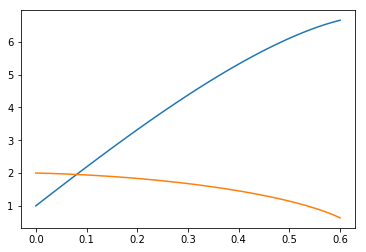

In [141]:
x0=0.6
t=np.linspace(0, x0,100)
U=integrate.odeint(dU_dt,[1,2],t)
plt.plot(t,U[:,0])
plt.plot(t,U[:,1])

3. Encuentre el espacio de fase de un resorte de constante elástica $k=0.1$ N/m con una masa en el extremo de $0.1$ Kg.

$$ \frac{d x}{dt} = v $$
$$ \frac{dv}{dt} = - \frac{k}{m} x$$


In [142]:
def dU_dt(U, t,k=0.1, m=0.1):
    '''
    Here U is a vector such that   x=U[0] and v=U[1]. 
    This function should return [x', v']
    '''    
    return [U[1], -(k/m)*U[0]]

In [143]:
Nic = 100
tmax= 10

#Maxim velocity
v_max = 4 #m/s

x0s = -4 + np.random.random(Nic)*8
v0s = -v_max + np.random.random(Nic)*2*v_max

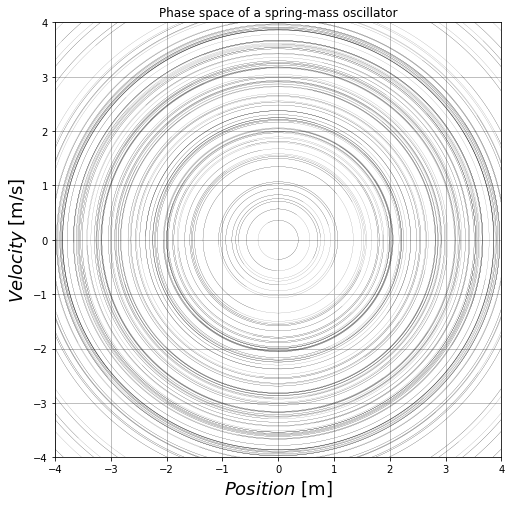

In [144]:
plt.figure( figsize = (8,8) )

for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,tmax,400)
    U0=[x0,v0]
    Us=integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw = 0.1, color = "black" )

#Format of figure
plt.xlabel( "$Position$ [m]", fontsize = 18 )
plt.ylabel( "$Velocity$ [m/s]", fontsize = 18 )
plt.xlim( (-4, 4) )
plt.ylim( (-v_max, v_max) )
plt.title( "Phase space of a spring-mass oscillator" )
plt.grid(1)    

3. Implemente la solución de [aquí](http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html#solving-odes)

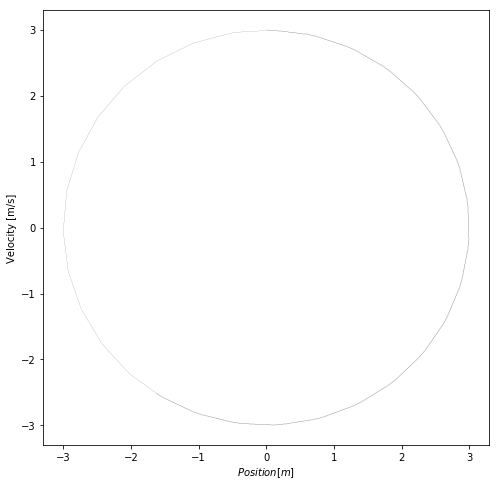

In [145]:
def h(y, t, params):
    x, v = y      # unpack current values of y
    k, m  = params  # unpack parameters
    derivs = [v,      
             -(k/m)*x]
    return derivs

# Parameters
k= 0.1          # elastic constatn
m = 0.1          # forcing amplitude

# Initial values
x0 = 0    # initial angular displacement
v0 = 3   # initial angular velocity

# Bundle parameters for ODE solver
params = [k, m]

# Bundle initial conditions for ODE solver
y0 = [x0, v0]

# Make time array for solution
tStop = 10
t = np.linspace(0, tStop)

# Call the ODE solver
psoln = odeint(h, y0, t, args=(params,))

# Plot position vs velocity
plt.figure( figsize = (8,8) )
plt.plot(psoln[:,0],psoln[:,1],lw = 0.1, color = "black" )
plt.xlabel('$Position [m]$')
plt.ylabel('Velocity [m/s]')
plt.show()

1. Implemente https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/

In [146]:
m = 0.1  # particle's mass
k = 0.1  # spriing coefficient

In [147]:
U0=np.zeros(2) # U is a vector such that   x=U[0] and v=U[1]
U0[1]=2

In [148]:
def g(U, t, args=(k,m)):
    # U has two components: U=[x, v].
    x, v = U[0], U[1]
    # We compute the second derivative u'' of u.
    dv = -k / m * x
    # We return U'=[v, dv].
    return np.r_[v, dv]

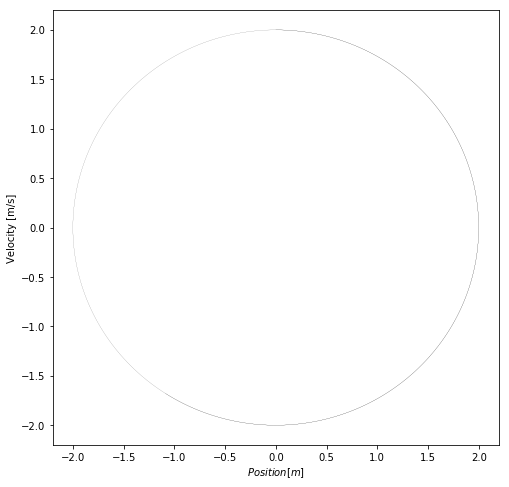

In [149]:
tmax=10
t=np.linspace(0,tmax,400)
Us=odeint(g,U0,t)
plt.figure( figsize = (8,8) )
plt.plot(Us[:,0],Us[:,1],lw = 0.1, color = "black" )
plt.xlabel('$Position [m]$')
plt.ylabel('Velocity [m/s]')
plt.show()


# Espacio de fase del péndulo

In [150]:
θ0 , ω0= [0,1]
l=0.1
g=9.8

In [151]:
def dU_dt(U, t, g=9.8, l=1 ):
    θ,ω = U
    return [ω, -g*np.sin(θ)/l]

In [152]:
t=np.linspace(0,10,1000)
Us=odeint(dU_dt,[θ0,ω0],t, args=(g,l,))
θ,ω=[Us[:,1],Us[:,0]]

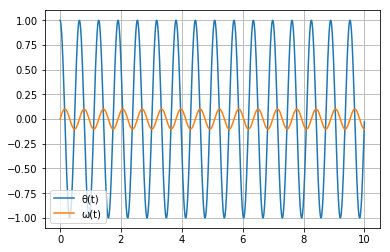

In [153]:
plt.plot(t,θ,label= 'θ(t)')
plt.plot(t,ω, label= 'ω(t)')
plt.legend()
plt.grid()

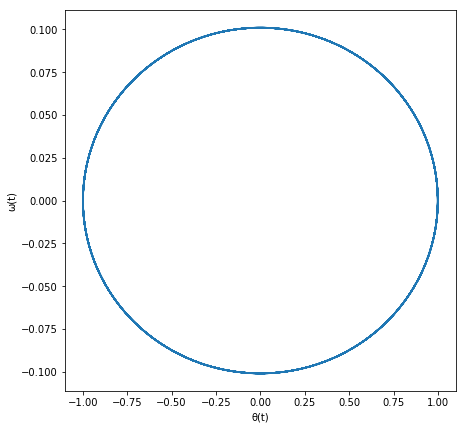

In [154]:
plt.figure(figsize=(7,7))
plt.plot(θ,ω)
plt.xlabel('θ(t)')
plt.ylabel('ω(t)')

# Ejercicio de la [página](http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html#solving-odes)

Resolver: $$ \frac{d{^2}\theta}{dt{^2}} = -\frac{1}{Q}\frac{d\theta}{dt} + \sin(\theta) + d\cos(\Omega t) $$


In [216]:
#Initial conditions
θi = 0.0     # initial angular displacement
ωi = 0.0     # initial angular velocity
con=[θi,ωi]

#Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Ω = 0.65         # drive frequency
params=[Q,d,Ω]

In [217]:
''' 
Desacople the second order Differential Equation in 
two first order Differential Equations
'''
def dU_dt(U,t,args=()): 
    θ,ω = U #Unpack current values of U
    return [ω, -(1/Q)*ω + np.sin(θ) +d*np.sin(Ω*t)]

In [222]:
# Make time array for solution
tStop = 200.
t=np.linspace(0,tStop,500) 

#Solve the equation
Us=odeint(dU_dt,con,t,args=(params,))

#Reasign ω , θ variables
θ,ω=[Us[:,0],Us[:,1]]

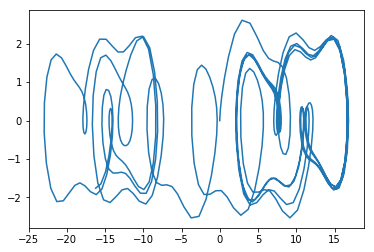

In [223]:
plt.plot(θ,ω)

# First order ODE

Excersice 11 pag 31 Jaime's book

In [ ]:
#Initial condition
x0=0
y0=5
icond=[x0,y0]

def dy_dx(y,x):
    return 2*x*np.exp(-x) + x**2 -y

In [ ]:
#Time array for solution
x=np.linspace(0,50,100)

#Solve the equation
Y=odeint(dy_dx,icond,x)

#Analitical solution
Y2=lambda x: (x**2)*np.exp(-x) + x**2 - 2*x +2 + 3*np.exp(-x)

In [ ]:
plt.plot(t,Y) #Plot numerical solution

In [ ]:
plt.plot(t,Y2(t)) #Plot analitical solution

# Spring-mass oscillator

In [41]:
#Initial conditions

x0s = -1 + np.random.random(100)*2
v0s = -1 + np.random.random(100)*2

#System Parameters
k = 1          # 
m = 1          # 
b= 1/3         # 
params=[k,m,b]

In [42]:
def dU_dt(U, t,args=()):
    x, v = U   
    return [v, -k*x/m - b*v/m]

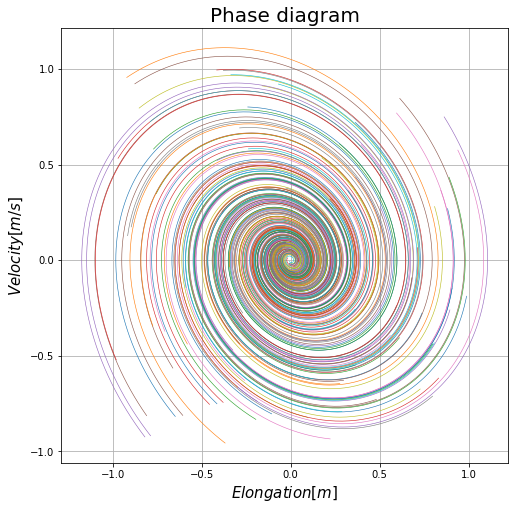

In [43]:
plt.figure( figsize = (8,8) )

for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,15,1000)
    icond=[x0,v0]
    Us=odeint(dU_dt,icond,t, args=(params,))
    plt.plot(Us[:,0],Us[:,1],lw = 0.6)
    plt.xlabel('$Elongation [m]$', size=15)
    plt.ylabel('$Velocity [m/s]$', size=15)
    plt.title('Phase diagram', size=20)

plt.grid()

# Adiag

1. Considere una matrix $A$, $3\times 3$ real, que se pueda diagonalizar con una transformación del  tipo
\begin{align}
  A_{\text{diag}}=P^T\cdot A \cdot U\,,
\end{align}
donde $P$ es una matrix de permutación ortogonal, es decir, de entradas 0 y $\pm 1$, y $U$ es una matriz de rotación en términos de tres ángulos de mezcla: $\theta_{12}$, $\theta_{23}$, $\theta_{13}$
\begin{align*}                                                                  
U=\begin{bmatrix}                                                                 
c_{12}c_{13}                    &s_{12}c_{13}                & s_{13}  \\       
-s_{12}c_{23}-c_{12}s_{23}s_{13}  & c_{12}c_{23}-s_{12}s_{23}s_{13}& s_{23}c_{13}\\                            s_{12}s_{23}-c_{12}c_{23}s_{13}  &-c_{12}s_{23}-s_{12}c_{23}s_{13}& c_{23}c_{13}\\ 
\end{bmatrix}                                                                   
\end{align*}
donde $c_{12}=\cos\theta_{12}$, etc. Construya una función de python, que acepte como entrada una matrix, y entrege como salida los tres autovectores ordenados de mayor a menor y los tres ángulos de mezcla en grados.  Aplique dicha función sobre la matrix:
```
A=np.array( [
 [7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
 [2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
 [6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )
```

In [63]:
A=np.array( [
[7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
[2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
[6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )

In [67]:
Ainv=linalg.inv(A)

In [72]:
λ2,V=np.linalg.eig(np.dot(A,A.transpose())) #V 
λ2,UU=np.linalg.eig( np.dot(A.transpose(),A) ) #U
UU

array([[ 0.7071057 , -0.7071057 ,  0.00174533],
       [-0.69657855, -0.69614994,  0.17364791],
       [ 0.12157242,  0.12400319,  0.98480625]])

In [89]:
s13=UU[0,2]
theta13= np.arcsin(s13)

c13=np.cos(theta13)
theta12=np.arccos(UU[0,0]/c13)
theta23=np.arcsin(UU[1,2]/c13)

angulosmezcla=(theta12,theta23,theta13)
angulosmezcla


(0.78539816339744839, 0.17453292519943286, 0.0017453292519942559)